# Linear Regression in Python
The following notebooks are an export of Andrew Ng's Machine Learning class from [Coursera](https://www.coursera.org): from Octave/Matlab code to python! I want to get more familiar with the great [sklearn](scikit-learn.org/) and with the rest of python's capabilities. I may skip some of the exercises as I see fit as this is a learning tool.

The first week is on Linear Regression and implementing Gradient Descent and normalization. Lets dive in!

In [1]:
import pandas as pd
import sklearn.preprocessing, sklearn.decomposition, \
    sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper, cross_val_score
from pathlib import Path, PureWindowsPath
import os, sys
import numpy as np

p = Path(os.getcwd()).parents[0]
ex1_path = Path(f'{p}\Octave Code\ex1')                
assert ex1_path.exists(), "Check path to data"
os.chdir(os.path.abspath(ex1_path))

df = pd.read_csv(Path(r'ex1data1.txt'))
df.columns = ['X', 'y']

Its always important to check what your data types are and if you have any null values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
X    96 non-null float64
y    96 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


Now that we have our data imported let's perform some Exploritory Data Analysis (EDA) to see what is going on!

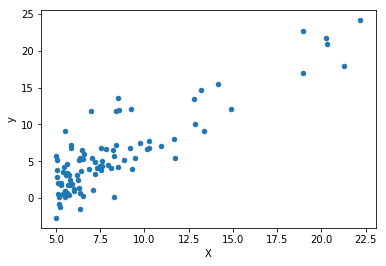

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='X', y='y')
plt.show()

We can see that there is a general positive correlation between the input *X* and the output *y*. I found out while making this that there are some [issues](https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num) in using Pandas and SKlearn. I find this surprising since they are both so big for Data Science... Oh well. There is a good solution ([sklearn-pandas](https://github.com/pandas-dev/sklearn-pandas)) which might be overkill for this small situation, but is good practice for more complex situations.

It encourages the good practice of using [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which I am a huge fan of after finishing my latest [DataCamp](https://www.datacamp.com/home) course, which was in Supervised Learning.

Here in this next block I will create my regression:
1. I use a DataFrame mapper which allows easy use of Pandas and SKlearn together. 
2. This data was already in float format so I don't have to worry about transforming it. 
3. Then I will add the mapper and regression to the pipeline
4. Lastly I fit and predict on the data.

In [4]:
mapper = DataFrameMapper([
    ('X', None)
])

pl = sklearn.pipeline.Pipeline ([
    ('featurize', mapper),
    ('lm', sklearn.linear_model.LinearRegression())
])

pl.fit(df, df.y)
y_pred = pl.predict(df)

In [5]:
# Get prediction Data
# Note that pred MUST have a column 'X'
pred = pd.DataFrame({'X':[35000, 70000]})
pl.predict(pred)

array([ 42469.94238279,  84944.09626958])

Finally we can plot our results and show the generated regression line!

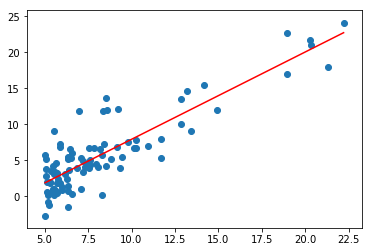

In [6]:
# Get indices for max and min points
ind_max = df.X.idxmax()
ind_min = df.X.idxmin()

# Plot Data with regression line
plt.plot([df.X.iloc[ind_max],df.X.iloc[ind_min]], [y_pred[ind_max], y_pred[ind_min]], c="red")
plt.scatter(df.X, df.y)
plt.show()

In just a few easy steps we have created a basic regression line. There are faster ways within python, but we took a route that is very extensible. We can use much more advanced algorithms just by altering our pipeline.